In [1]:
%pylab inline
%precision 6
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.max_colwidth=100
np.set_printoptions(linewidth=140,edgeitems=10)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

Populating the interactive namespace from numpy and matplotlib


## Data analysis

In [6]:
data = pd.read_csv("California.csv",index_col=0)
data.head()

,MedianHouseValue,MedianIncome,MedianHouseAge,TotalRooms,TotalBedrooms,Population,Households,Latitude,Longitude
1,452600.0,8.3252,41,880.0,129,322,126,37.88,-122.23
2,358500.0,8.3014,21,7099.0,1106,2401,1138,37.86,-122.22
3,352100.0,7.2574,52,1467.0,190,496,177,37.85,-122.24
4,341300.0,5.6431,52,1274.0,235,558,219,37.85,-122.25
5,342200.0,3.8462,52,1627.0,280,565,259,37.85,-122.25


In [63]:
data.describe()

,MedianHouseValue,MedianIncome,MedianHouseAge,TotalRooms,TotalBedrooms,Population,Households,Latitude,Longitude
count,20640.000000,19833.000000,20640.000000,19809.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,206855.816909,3.866405,28.639486,2638.515220,537.898014,1425.476744,499.539680,35.631861,-119.569704
std,115395.615874,1.897745,12.585558,2184.459291,421.247906,1132.462122,382.329753,2.135952,2.003532
min,14999.000000,0.499900,1.000000,2.000000,1.000000,3.000000,1.000000,32.540000,-124.350000
25%,119600.000000,2.562500,18.000000,1452.000000,295.000000,787.000000,280.000000,33.930000,-121.800000
50%,179700.000000,3.531300,29.000000,2129.000000,435.000000,1166.000000,409.000000,34.260000,-118.490000
75%,264725.000000,4.737500,37.000000,3149.000000,647.000000,1725.000000,605.000000,37.710000,-118.010000
max,500001.000000,15.000100,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,41.950000,-114.310000


### Price distribution

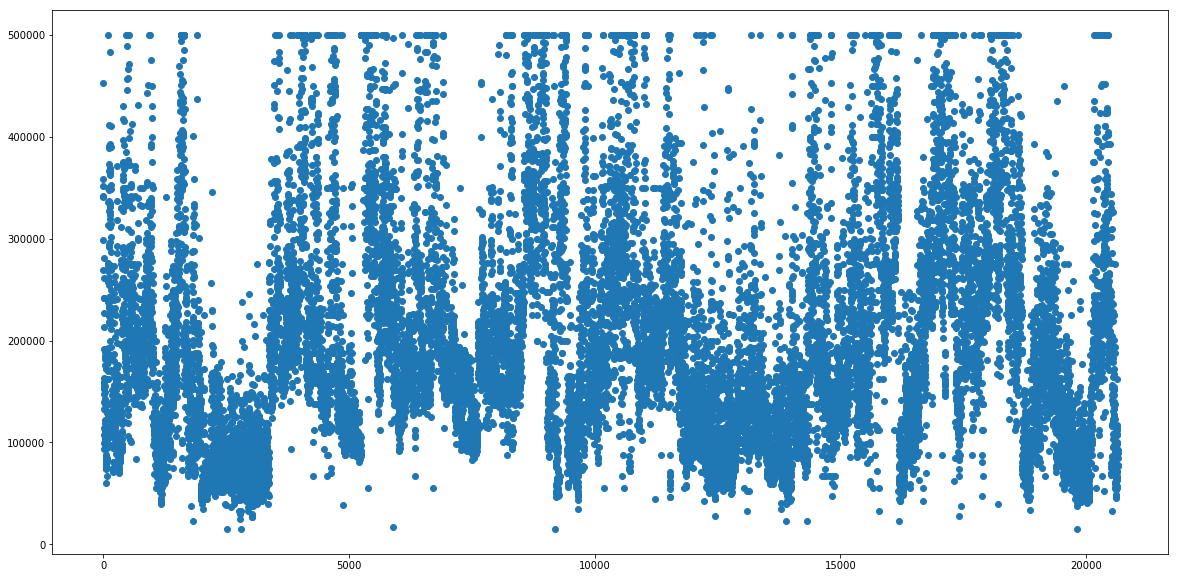

In [64]:
rcParams['figure.figsize'] = (20.0, 10.0)
plt.scatter(data.index, data.MedianHouseValue)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb9354cdba8>, <matplotlib.axes._subplots.AxesSubplot object at 0x7fb9353c81d0>,
       [<matplotlib.axes._subplots.AxesSubplot object at 0x7fb9352e7da0>, <matplotlib.axes._subplots.AxesSubplot object at 0x7fb9352d2160>,
       [<matplotlib.axes._subplots.AxesSubplot object at 0x7fb935229da0>, <matplotlib.axes._subplots.AxesSubplot object at 0x7fb9351e5668>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fb9351b1a58>]], dtype=object)

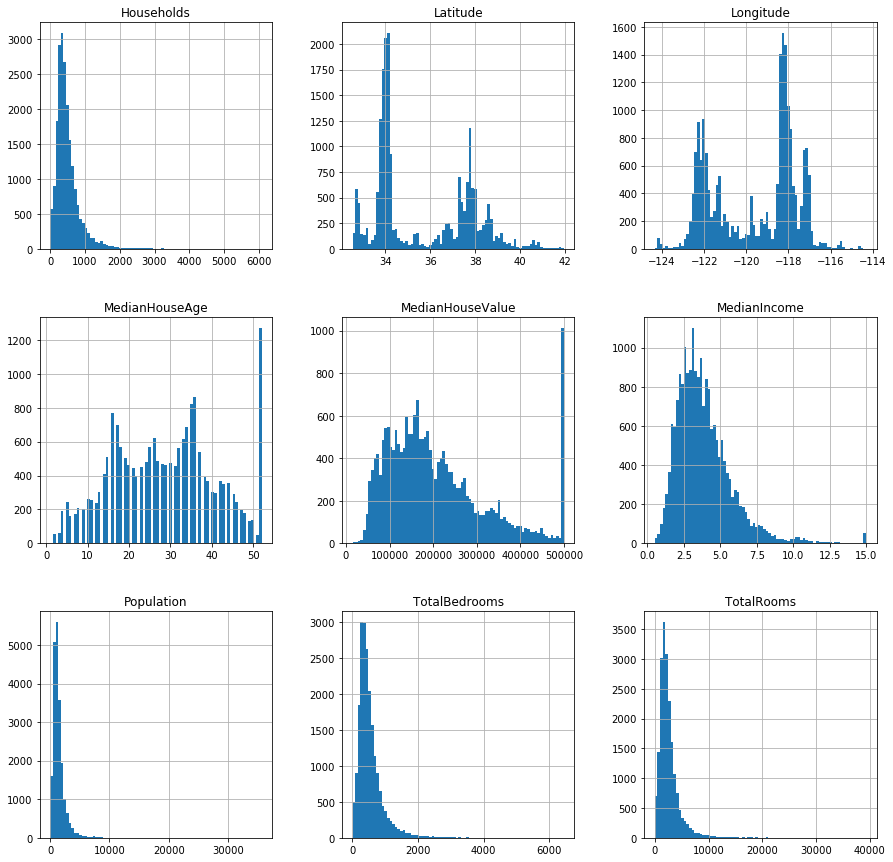

In [65]:
rcParams['figure.figsize'] = (15.0, 15.0)
data.hist(bins=80)

### Analysis houses more expensive than 499999

In [19]:
tops = data[data.MedianHouseValue > 499999]
print(len(tops))
tops.head()

992


,MedianHouseValue,MedianIncome,MedianHouseAge,TotalRooms,TotalBedrooms,Population,Households,Latitude,Longitude
90,500001.0,1.2434,52,249.0,78,396,85,37.80,-122.27
460,500001.0,1.1696,52,609.0,236,1349,250,37.87,-122.25
494,500001.0,7.8521,52,1668.0,225,517,214,37.86,-122.24
495,500001.0,9.3959,52,3726.0,474,1366,496,37.85,-122.24
510,500001.0,7.8772,52,2990.0,379,947,361,37.83,-122.23


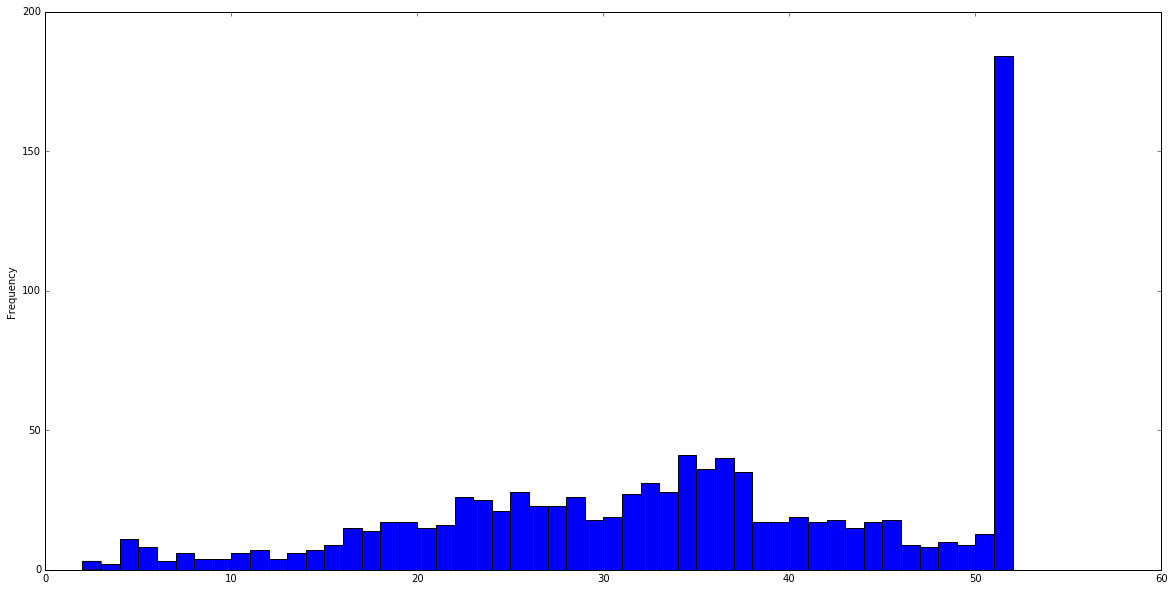

In [26]:
tops.MedianHouseAge.plot(bins=50, kind='hist')

## Preprocessing

#### Correlation revealing

In [41]:
# consider correlation if it has more than 90 % of data in a column
data.corr(min_periods=int(0.9*len(data)))

,MedianHouseValue,MedianIncome,MedianHouseAge,TotalRooms,TotalBedrooms,Population,Households,Latitude,Longitude
MedianHouseValue,1.000000,0.687415,0.105623,0.131135,0.050594,-0.024650,0.065843,-0.144160,-0.045967
MedianIncome,0.687415,1.000000,-0.117651,0.196630,-0.007474,0.004610,0.013317,-0.080319,-0.014378
MedianHouseAge,0.105623,-0.117651,1.000000,-0.361827,-0.320485,-0.296244,-0.302916,0.011173,-0.108197
TotalRooms,0.131135,0.196630,-0.361827,1.000000,0.929979,0.857464,0.918617,-0.035187,0.044425
TotalBedrooms,0.050594,-0.007474,-0.320485,0.929979,1.000000,0.878026,0.979829,-0.066318,0.068378
Population,-0.024650,0.004610,-0.296244,0.857464,0.878026,1.000000,0.907222,-0.108785,0.099773
Households,0.065843,0.013317,-0.302916,0.918617,0.979829,0.907222,1.000000,-0.071035,0.055310
Latitude,-0.144160,-0.080319,0.011173,-0.035187,-0.066318,-0.108785,-0.071035,1.000000,-0.924664
Longitude,-0.045967,-0.014378,-0.108197,0.044425,0.068378,0.099773,0.055310,-0.924664,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb9355ccf98>, <matplotlib.axes._subplots.AxesSubplot object at 0x7fb8dbe6dd30>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fb8dbd43278>, <matplotlib.axes._subplots.AxesSubplot object at 0x7fb8dbc53a90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fb8dbdcfeb8>, <matplotlib.axes._subplots.AxesSubplot object at 0x7fb8dbda06d8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fb8dbce3828>, <matplotlib.axes._subplots.AxesSubplot object at 0x7fb8dbe1f518>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fb8dbd21748>, <matplotlib.axes._subplots.AxesSubplot object at 0x7fb8dbc1d358>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fb8dbbe0860>, <matplotlib.axes._subplots.AxesSubplot object at 0x7fb8dbc2e3c8>],
       [<matplotlib.axes._subplots.AxesSubplot object at 0x7fb8dbb5c978>, <matplotlib.axes._subplots.AxesSubplot object at 0x7fb8dbb1dba8>,
        <matplotlib

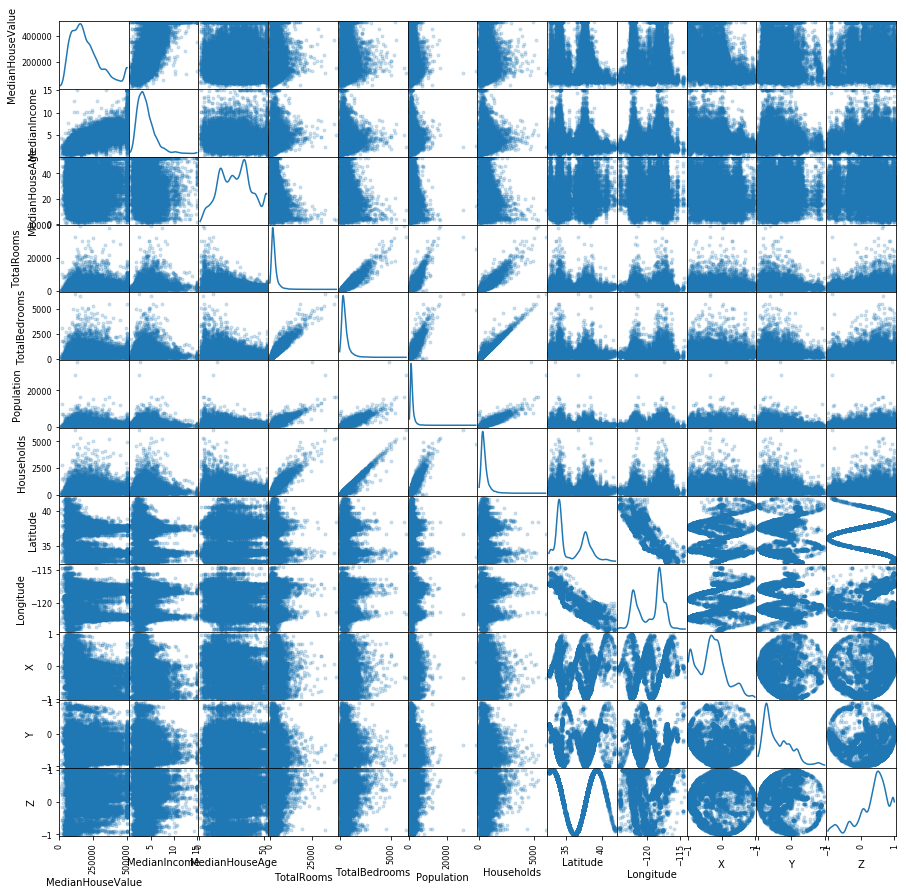

In [68]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(data, alpha=0.2, figsize=(15, 15), diagonal='kde')

- TotalRooms - TotalBedrooms = 0.929979 (stay)
- Households - TotalRooms    = 0.918617 (-)
- Households - TotalBedRooms = 0.979829 (pairvise)
- Households - Population    = 0.907222 (stay)
- Latitude - Longitude -> X, Y, Z (extend data)

#### NaN values impute

In [33]:
# reveal collumns with missing values in order to see the change in ditribution
pd.isnull(data).sum() / len(data)

MedianHouseValue    0.000000
MedianIncome        0.039099
MedianHouseAge      0.000000
TotalRooms          0.040262
TotalBedrooms       0.000000
Population          0.000000
Households          0.000000
Latitude            0.000000
Longitude           0.000000
dtype: float64

###### TotalRooms = TotalBedRooms + mean(TotalRooms - TotalBedrooms) if NaN

In [16]:
def get_mean_diff():
    t = data.dropna()
    return np.mean(t['TotalRooms'] - t['TotalBedrooms'])

diff = get_mean_diff()
print(diff)
data['TotalRooms']=data['TotalRooms'].fillna(data['TotalBedrooms'] + diff)

2015.43997378


##### MedianIncome = median(MedianIncome) if NaN

In [20]:
m = np.median(data.dropna()['MedianIncome'])
print(m)
data['MedianIncome']=data['MedianIncome'].fillna(m)

3.5313


MedianHouseValue    0.0
MedianIncome        0.0
MedianHouseAge      0.0
TotalRooms          0.0
TotalBedrooms       0.0
Population          0.0
Households          0.0
Latitude            0.0
Longitude           0.0
dtype: float64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3000fa6240>, <matplotlib.axes._subplots.AxesSubplot object at 0x7f3000afd668>,
       [<matplotlib.axes._subplots.AxesSubplot object at 0x7f300073e6a0>, <matplotlib.axes._subplots.AxesSubplot object at 0x7f3000700ba8>,
       [<matplotlib.axes._subplots.AxesSubplot object at 0x7f3000681240>, <matplotlib.axes._subplots.AxesSubplot object at 0x7f30011f2a58>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f30005ed6a0>]], dtype=object)

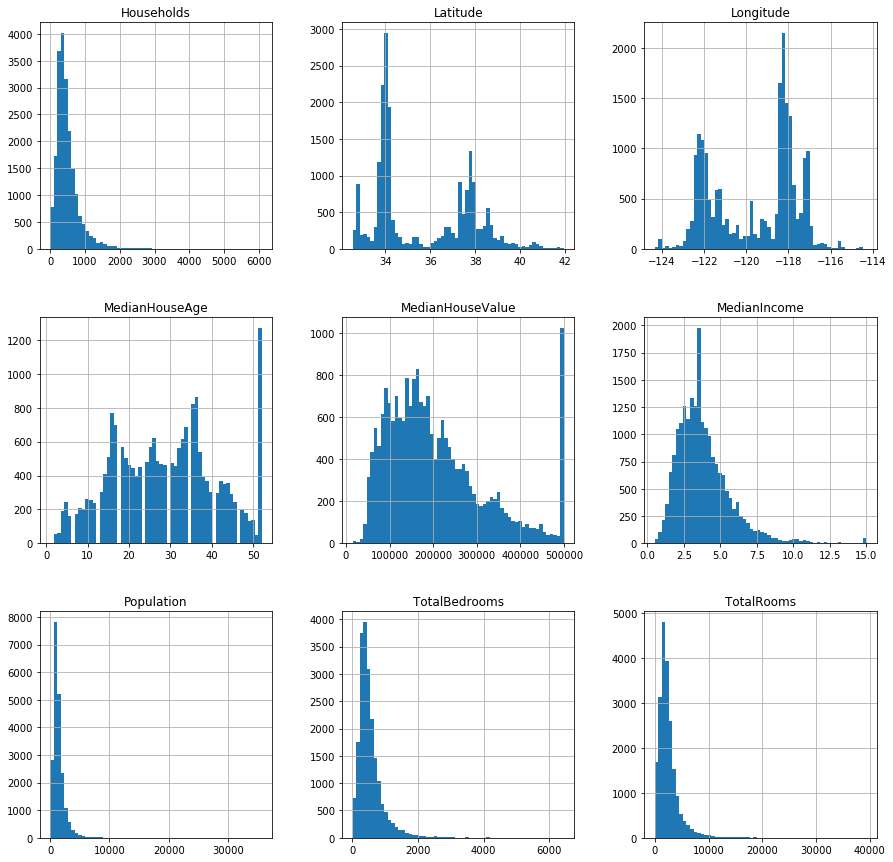

In [23]:
print(pd.isnull(data).sum() / len(data))
rcParams['figure.figsize'] = (15.0, 15.0)
data.hist(bins=60)

##### for imputer strategy we choose median as:
    it saves the distribution more and the correlation loss is just 1 percent.
- MedianIncome
- TotalRooms

In [68]:
data.corr()

,MedianHouseValue,MedianIncome,MedianHouseAge,TotalRooms,TotalBedrooms,Population,Households,Latitude,Longitude,X,Y,Z,s_Population,s_TotalRooms,s_TotalBedrooms
MedianHouseValue,1.000000,0.673805,0.105623,0.126564,0.050594,-0.024650,0.065843,-0.144160,-0.045967,-0.423198,-0.051559,0.036689,-0.021158,0.150729,0.057024
MedianIncome,0.673805,1.000000,-0.115081,0.185901,-0.007127,0.004682,0.013298,-0.078700,-0.014148,-0.206302,-0.068666,0.017964,-0.004093,0.196009,-0.022118
MedianHouseAge,0.105623,-0.115081,1.000000,-0.352225,-0.320485,-0.296244,-0.302916,0.011173,-0.108197,-0.311922,-0.093389,-0.038209,-0.243673,-0.332522,-0.301874
TotalRooms,0.126564,0.185901,-0.352225,1.000000,0.903416,0.835736,0.893149,-0.033383,0.041986,0.035536,-0.005499,0.031609,0.665629,0.875782,0.794101
TotalBedrooms,0.050594,-0.007127,-0.320485,0.903416,1.000000,0.878026,0.979829,-0.066318,0.068378,0.026157,-0.018846,0.041574,0.722777,0.794821,0.891619
Population,-0.024650,0.004682,-0.296244,0.835736,0.878026,1.000000,0.907222,-0.108785,0.099773,0.021385,-0.082671,0.022028,0.794380,0.719977,0.784254
Households,0.065843,0.013298,-0.302916,0.893149,0.979829,0.907222,1.000000,-0.071035,0.055310,-0.014011,-0.036571,0.035743,0.754499,0.792152,0.880411
Latitude,-0.144160,-0.078700,0.011173,-0.033383,-0.066318,-0.108785,-0.071035,1.000000,-0.924664,-0.199960,0.211433,-0.356723,-0.136241,-0.030604,-0.070835
Longitude,-0.045967,-0.014148,-0.108197,0.041986,0.068378,0.099773,0.055310,-0.924664,1.000000,0.480389,-0.229223,0.418811,0.108784,0.030930,0.065007
X,-0.423198,-0.206302,-0.311922,0.035536,0.026157,0.021385,-0.014011,-0.199960,0.480389,1.000000,-0.071961,0.153135,0.001118,0.021918,0.016202


#### geo data
- x = cos(lat) * cos(lon)
- y = cos(lat) * sin(lon)
- z = sin(lat) 

In [25]:
data['X'] = data.apply(lambda row: np.multiply(np.cos(row['Latitude']), np.cos(row['Longitude'])), axis=1)
data['Y'] = data.apply(lambda row: np.multiply(np.cos(row['Latitude']), np.sin(row['Longitude'])), axis=1)
data['Z'] = data.apply(lambda row: np.sin(row['Latitude']), axis=1)

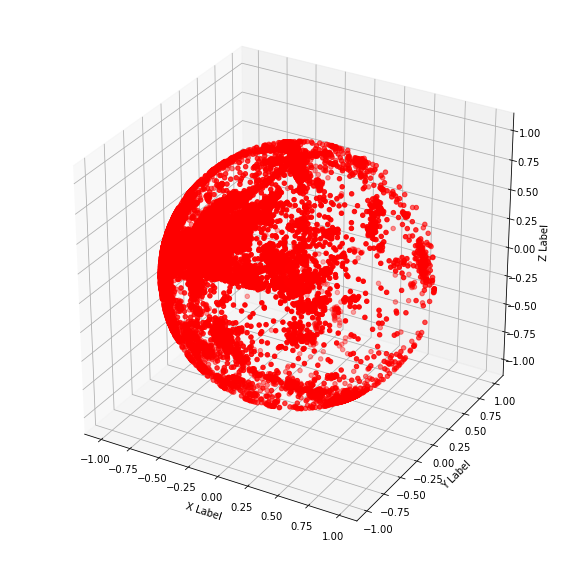

In [6]:
'''
==============
3D scatterplot
==============

Demonstration of a basic scatterplot in 3D.
'''

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data['X'], data['Y'], data['Z'], c='r')
 #marker
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

#### Skew removing

/home/ildar/miniconda3/envs/ds/lib/python3.5/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)


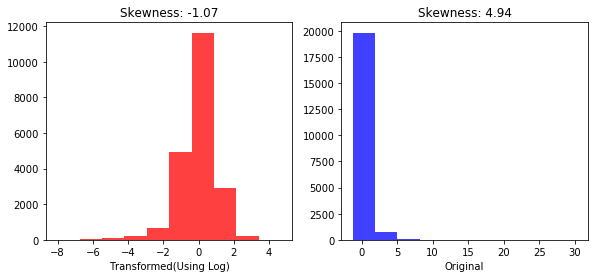

In [65]:
from scipy.stats import skew
from sklearn import preprocessing
from scipy.stats import boxcox

rcParams['figure.figsize'] = 15,4
# vals_new = preprocessing.scale(np.sqrt(data['Population'])) 
# vals_new = preprocessing.scale(boxcox(data['Population']+1)[0])
vals_new = preprocessing.scale(np.log(data['Population'])) 
vals_old = preprocessing.scale(data['Population'])

#Next We calculate Skewness using skew in spicy.stats
skness = skew(vals_new)
sknessOrig = skew(vals_old)
#We draw the histograms 
figure = plt.figure()

figure.add_subplot(131)   
plt.hist(vals_new,facecolor='red',alpha=0.75) 
plt.xlabel("Transformed(Using Log)") 
plt.title("Skewness: {0:.2f}".format(skness)) 

figure.add_subplot(132) 
plt.hist(vals_old,facecolor='blue',alpha=0.75) 
plt.xlabel("Original") 
plt.title("Skewness: {0:.2f}".format(sknessOrig)) 

# figure.add_subplot(133) 
# plt.boxplot(vals_new)
# plt.xlabel("Original") 

plt.show()

In [67]:
from scipy.stats import boxcox
data['s_Population'] = data['Population'].apply(np.log)
bxcx = lambda x : boxcox(x+1)
data['s_TotalRooms'], _ = bxcx(data['TotalRooms'])
data['s_TotalBedrooms'], _ = bxcx(data['TotalBedrooms'])

#### Final feature set cut

In [27]:
list(data)

['MedianHouseValue',
 'MedianIncome',
 'MedianHouseAge',
 'TotalRooms',
 'TotalBedrooms',
 'Population',
 'Households',
 'Latitude',
 'Longitude',
 'X',
 'Y',
 'Z',
 's_Population',
 's_TotalRooms',
 's_TotalBedrooms']

In [36]:
F = {}
F['original'] = set(data)
F['geo'] = set(('X', 'Y', 'Z'))
# F['final'] = F['original'] - set(('Population', 'Latitude', 'Longitude', 'MedianHouseValue')) | F['geo']
# F['final'] = F['original'] - set(('TotalRooms', 'TotalBedrooms','Population', 'Latitude', 'Longitude', 'MedianHouseValue')) | F['geo']
F['final'] = F['original'] - set(('TotalRooms', 'TotalBedrooms','Population', 'MedianHouseValue')) | F['geo']

F['target'] = 'MedianHouseValue'
print(F['final'])
print(F['target'])

{'Longitude', 'MedianHouseAge', 's_TotalBedrooms', 'MedianIncome', 'X', 'Latitude', 'Y', 's_Population', 's_TotalRooms', 'Households', 'Z'}
MedianHouseValue


In [73]:
data.loc[:, F['final'] | set((F['target'],))].corr()

,MedianHouseValue,s_TotalBedrooms,MedianIncome,MedianHouseAge,Z,Y,s_TotalRooms,Households,X,s_Population
MedianHouseValue,1.000000,0.057024,0.673805,0.105623,0.036689,-0.051559,0.159023,0.065843,-0.423198,-0.021158
s_TotalBedrooms,0.057024,1.000000,-0.022118,-0.301874,0.039182,-0.004647,0.919305,0.880411,0.016202,0.881671
MedianIncome,0.673805,-0.022118,1.000000,-0.115081,0.017964,-0.068666,0.209222,0.013298,-0.206302,-0.004093
MedianHouseAge,0.105623,-0.301874,-0.115081,1.000000,-0.038209,-0.093389,-0.344865,-0.302916,-0.311922,-0.243673
Z,0.036689,0.039182,0.017964,-0.038209,1.000000,-0.076344,0.025639,0.035743,0.153135,0.013024
Y,-0.051559,-0.004647,-0.068666,-0.093389,-0.076344,1.000000,0.012649,-0.036571,-0.071961,-0.084642
s_TotalRooms,0.159023,0.919305,0.209222,-0.344865,0.025639,0.012649,1.000000,0.818418,0.024577,0.831058
Households,0.065843,0.880411,0.013298,-0.302916,0.035743,-0.036571,0.818418,1.000000,-0.014011,0.754499
X,-0.423198,0.016202,-0.206302,-0.311922,0.153135,-0.071961,0.024577,-0.014011,1.000000,0.001118
s_Population,-0.021158,0.881671,-0.004093,-0.243673,0.013024,-0.084642,0.831058,0.754499,0.001118,1.000000


In [42]:
x_data = data.loc[:, F['final']]
y_data = data.loc[:, F['target']]
x_data.head()

,Longitude,MedianHouseAge,s_TotalBedrooms,MedianIncome,X,Latitude,Y,s_Population,s_TotalRooms,Households,Z
1,-122.23,41,8.664655,8.3252,-0.942013,37.88,-0.283278,5.774552,17.463241,126,0.179903
2,-122.22,21,16.546285,8.3014,-0.942380,37.86,-0.293696,7.783641,31.884174,1138,0.160195
3,-122.24,52,9.823575,7.2574,-0.949556,37.85,-0.275223,6.206576,20.340994,177,0.150316
4,-122.25,52,10.503465,5.6431,-0.952261,37.85,-0.265714,6.324359,19.510170,219,0.150316
5,-122.25,52,11.088409,3.8462,-0.952261,37.85,-0.265714,6.336826,20.969331,259,0.150316


## Building model

##### MAPE metric for regression evaluation

In [78]:
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import KFold, cross_val_score, StratifiedShuffleSplit
from time import time
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.33, random_state=42)
kfold = KFold(len(data), n_folds=4, shuffle=True, random_state=42)

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def print_mape(model):
    y_hat = model.predict(x_test)
    mape = mean_absolute_percentage_error(y_test, y_hat)
    print("MAPE: %.4f" % mape)

for kfold we choose n_folds=4 as its test percentage is near 30%

In [10]:
print(len(data))
for x, t in kfold:
    print(len(x), len(t), len(t) / (len(x) + len(t)) )

20640
15480 5160 0.25
15480 5160 0.25
15480 5160 0.25
15480 5160 0.25


#### Logistic regression

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

pip_log_reg = Pipeline([('scaler', StandardScaler()), ('clf', LogisticRegression())])

# params = {'scaler' : (None, StandardScaler(), RobustScaler()),
#           'clf__C': [0.1, 10, 100]}
params = {'scaler' : [StandardScaler()],
          'clf__C': [0.1]}
log_reg = GridSearchCV(pip_log_reg, params, n_jobs=8, cv=kfold)
t0 = time()
log_reg.fit(x_data, y_data)
print("Done in %0.3fs" % (time() - t0))


Done in 298.519s


In [44]:
for score in log_reg.grid_scores_:
    print (score.mean_validation_score, score.parameters)
log_reg.best_score_, log_reg.best_params_

0.0496124031008 {'scaler': StandardScaler(copy=True, with_mean=True, with_std=True), 'clf__C': 0.1}


/home/ildar/miniconda3/envs/ds/lib/python3.5/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


(0.049612,
 {'clf__C': 0.100000,
  'scaler': StandardScaler(copy=True, with_mean=True, with_std=True)})

#### Stochastic Gradient Descent

In [70]:
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import GridSearchCV
pip_sgd = Pipeline([('scaler', StandardScaler()), ('clf', SGDRegressor(average=True))])

params = {'scaler' : (None, StandardScaler(), RobustScaler()) ,
            'clf__penalty': ('l1', 'l2', 'elasticnet'), 
          'clf__alpha': (0.0005, 0.0001, 0.00001, 0.000001),
          'clf__average' : (True,False),
         'clf__loss': ('squared_loss', 'huber')}
sgd = GridSearchCV(pip_sgd, params, n_jobs=8, cv=kfold)
t0 = time()
sgd.fit(x_data, y_data)
print("Done in %0.3fs" % (time() - t0))

Done in 17.298s


In [74]:
sgd.best_estimator_.named_steps

{'clf': SGDRegressor(alpha=0.0005, average=False, epsilon=0.1, eta0=0.01,
        fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
        loss='squared_loss', n_iter=5, penalty='elasticnet', power_t=0.25,
        random_state=None, shuffle=True, verbose=0, warm_start=False),
 'scaler': StandardScaler(copy=True, with_mean=True, with_std=True)}

In [73]:
plt.axvline(sgd.best_estimator_.named_steps['alpha'],
            linestyle=':', label='n_components chosen')

KeyError: 'alpha'

In [71]:
for score in sgd.grid_scores_:
    print (score.mean_validation_score, score.parameters)
sgd.best_score_, sgd.best_params_

-2.65377185253e+14 {'scaler': None, 'clf__loss': 'squared_loss', 'clf__average': True, 'clf__alpha': 0.0005, 'clf__penalty': 'l1'}
0.64147644695 {'scaler': StandardScaler(copy=True, with_mean=True, with_std=True), 'clf__loss': 'squared_loss', 'clf__average': True, 'clf__alpha': 0.0005, 'clf__penalty': 'l1'}
0.629921406286 {'scaler': RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True), 'clf__loss': 'squared_loss', 'clf__average': True, 'clf__alpha': 0.0005, 'clf__penalty': 'l1'}
-4.96520053363e+14 {'scaler': None, 'clf__loss': 'squared_loss', 'clf__average': True, 'clf__alpha': 0.0005, 'clf__penalty': 'l2'}
0.641156680147 {'scaler': StandardScaler(copy=True, with_mean=True, with_std=True), 'clf__loss': 'squared_loss', 'clf__average': True, 'clf__alpha': 0.0005, 'clf__penalty': 'l2'}
0.629448121216 {'scaler': RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True), 'clf__loss': 'squared_loss', 'cl

/home/ildar/miniconda3/envs/ds/lib/python3.5/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


(0.646054,
 {'clf__alpha': 0.000500,
  'clf__average': False,
  'clf__loss': 'squared_loss',
  'clf__penalty': 'elasticnet',
  'scaler': StandardScaler(copy=True, with_mean=True, with_std=True)})

In [79]:
print_mape(sgd)

MAPE: 30.4434


#### Ridge regression

In [44]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

pip_ridge = Pipeline([('scaler', StandardScaler()), ('clf', Ridge())])

r_params = {'scaler' : (None, StandardScaler(), RobustScaler(), MinMaxScaler()) ,
          'clf__alpha': (0.1, 0.5, 1, 1.2),
           'clf__random_state': (241,)}
ridge = GridSearchCV(pip_ridge, r_params, n_jobs=8, cv=kfold)
t0 = time()
ridge.fit(x_data, y_data)
print("Done in %0.3fs" % (time() - t0))

Done in 2.168s


In [45]:
for score in ridge.grid_scores_:
    print (score.mean_validation_score, score.parameters)
ridge.best_score_, ridge.best_params_

0.647674307439 {'scaler': None, 'clf__random_state': 241, 'clf__alpha': 0.1}
0.647674326472 {'scaler': StandardScaler(copy=True, with_mean=True, with_std=True), 'clf__random_state': 241, 'clf__alpha': 0.1}
0.647674381669 {'scaler': RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True), 'clf__random_state': 241, 'clf__alpha': 0.1}
0.647668297581 {'scaler': MinMaxScaler(copy=True, feature_range=(0, 1)), 'clf__random_state': 241, 'clf__alpha': 0.1}
0.647674326894 {'scaler': None, 'clf__random_state': 241, 'clf__alpha': 0.5}
0.64767438835 {'scaler': StandardScaler(copy=True, with_mean=True, with_std=True), 'clf__random_state': 241, 'clf__alpha': 0.5}
0.647674353315 {'scaler': RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True), 'clf__random_state': 241, 'clf__alpha': 0.5}
0.647527579732 {'scaler': MinMaxScaler(copy=True, feature_range=(0, 1)), 'clf__random_state': 241, 'clf__alpha': 0.5}
0.6476743

/home/ildar/miniconda3/envs/ds/lib/python3.5/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


(0.647674,
 {'clf__alpha': 0.500000,
  'clf__random_state': 241,
  'scaler': StandardScaler(copy=True, with_mean=True, with_std=True)})

In [81]:
print_mape(ridge)

MAPE: 30.4629


#### Support Vector regression

In [84]:
from sklearn.svm import SVR

pip_svr = Pipeline([('scaler', StandardScaler()), ('clf', SVR())])

params = {'scaler' : ( StandardScaler(), RobustScaler(),) ,
          'clf__C' : (1e3, 1), 
          'clf__kernel' : ('poly', 'linear', 'rbf') }#, SVR(kernel='poly', degree = 2), SVR(kernel='rbf', gamma = 0.1))}
svr = GridSearchCV(pip_svr, params, n_jobs=8, cv=kfold)
t0 = time()
svr.fit(x_data, y_data)
print("Done in %0.3fs" % (time() - t0))

KeyboardInterrupt: 

In [19]:
for score in svr.grid_scores_:
    print (score.mean_validation_score, score.parameters)
svr.best_score_, svr.best_params_

0.512594003678 {'clf__C': 1000.0, 'scaler': StandardScaler(copy=True, with_mean=True, with_std=True), 'clf': SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)}
0.365975496955 {'clf__C': 1000.0, 'scaler': RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True), 'clf': SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)}


/home/ildar/miniconda3/envs/ds/lib/python3.5/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


(0.512594,
 {'clf': SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
  'clf__C': 1000.000000,
  'scaler': StandardScaler(copy=True, with_mean=True, with_std=True)})

In [28]:
y_lin = svr.predict(x_test)

In [29]:
from sklearn.metrics import mean_squared_error
mse_lin = math.sqrt(mean_squared_error(y_test, y_lin))
#mse_poly = math.sqrt(mean_squared_error(y_test, y_poly))
#mse_rbf = math.sqrt(mean_squared_error(y_test, y_rbf))

print("rmse_lin: %.4f" % mse_lin)
#print("rmse_poly: %.4f" % mse_poly
#print("rmse_rbf: %.4f" % mse_rbf)

rmse_lin: 76800.6664


In [30]:
mean_absolute_percentage_error(y_test, y_lin)

29.605371

### Decision tree regressor

In [53]:
from sklearn.grid_search import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline

pip_tree = Pipeline([ ('clf', DecisionTreeRegressor())])
tree_params = {'clf__min_samples_leaf':[1,3,10,50,100,500],}
tree = GridSearchCV(pip_tree, tree_params, n_jobs=8, cv=kfold)

t0 = time()
tree.fit(x_data, y_data)
print("Done in %0.3fs" % (time() - t0))

Done in 1.428s


In [54]:
for score in tree.grid_scores_:
    print (score.mean_validation_score, score.parameters)
tree.best_score_, tree.best_params_

0.6573752022370107 {'clf__min_samples_leaf': 1}
0.7082356740536278 {'clf__min_samples_leaf': 3}
0.7501357134795857 {'clf__min_samples_leaf': 10}
0.7274449348692104 {'clf__min_samples_leaf': 50}
0.7000172127749101 {'clf__min_samples_leaf': 100}
0.5959442072572622 {'clf__min_samples_leaf': 500}


(0.750136, {'clf__min_samples_leaf': 10})

In [85]:
print_mape(tree)

MAPE: 14.4293


#### AdaBoost

In [ ]:
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import AdaBoostRegressor
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor

rng = np.random.RandomState(1)
pip_boost = Pipeline([('clf', AdaBoostRegressor())])
boost_param = {'clf__base_estimator': [DecisionTreeRegressor(max_depth=10), 
                                   DecisionTreeRegressor(max_depth=8), 
                                   DecisionTreeRegressor(max_depth=12)],
           'clf__n_estimators': [50, 150, 200, 250, 300, 350],
           'clf__random_state': [rng],
          'clf__loss' : ['linear', 'square'],
              'clf__learning_rate' : [0.5, 0.8, 1., 1.2]}
boost = GridSearchCV(pip_boost, boost_param, n_jobs=8, cv=kfold)

t0 = time()
boost.fit(x_data, y_data)
print("Done in %0.3fs" % (time() - t0))

In [48]:
for score in boost.grid_scores_:
    print (score.mean_validation_score, score.parameters)
boost.best_score_, boost.best_params_

0.800739058608061 {'clf__n_estimators': 50, 'clf__loss': 'linear', 'clf__random_state': <mtrand.RandomState object at 0x7f2fec04be10>, 'clf__base_estimator': DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')}
0.800254106180584 {'clf__n_estimators': 150, 'clf__loss': 'linear', 'clf__random_state': <mtrand.RandomState object at 0x7f2fec0463a8>, 'clf__base_estimator': DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')}
0.7998709721720552 {'clf__n_estimators': 200, 'clf__loss': 'linear', 'clf__random_state': <mtrand.RandomState o

(0.806997,
 {'clf__base_estimator': DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False, random_state=None,
             splitter='best'),
  'clf__loss': 'square',
  'clf__n_estimators': 300,
  'clf__random_state': <mtrand.RandomState at 0x7f2fec05f2d0>})

In [86]:
print_mape(boost)

MAPE: 14.1154


## Apply model

In [ ]:
from sklearn import metrics
#ridge.fit(X_data, data['Salary'])
Y_pred = ridge.predict(test)

In [ ]:
neg = list(filter(lambda x: x < 0, Y_pred))
print (neg, len(neg))

In [ ]:
math.sqrt(abs(sum(neg)))

### Store results

In [ ]:
f = open(path + r'submission.csv', 'r+')
f.write('Id,Salary\n')
for i in range(len(Y_pred)):
    f.write('%s,%s\n' % (test_data['Id'][i], Y_pred[i]))
f.close()